In [1]:
# Datset source
# https://archive.ics.uci.edu/ml/datasets/Air+Quality#

In [2]:
# Problem Statement: Predict the temperature(T) based on the pollutants concentration and humidity in the environment 

In [3]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# Read the dataset

import pandas as pd
aqu_df = pd.read_csv('AirQualityUCI/AirQualityUCI.csv', sep=';')
print(aqu_df.shape)
aqu_df.head()

(9471, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [5]:
# Remove empty rows and columns

aqu_df.dropna(axis=0, how='all', inplace=True)
aqu_df.dropna(axis=1, how='all', inplace=True)
print(aqu_df.shape)
aqu_df.head()

(9357, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [6]:
# Remove Date and Time columns since they might influence temperature

aqu_df.drop(columns=['Date', 'Time'], inplace=True)
print(aqu_df.shape)
aqu_df.head()

(9357, 13)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
# Info about the dataframe

aqu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


In [8]:
# Some statistics about the dataframe

aqu_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


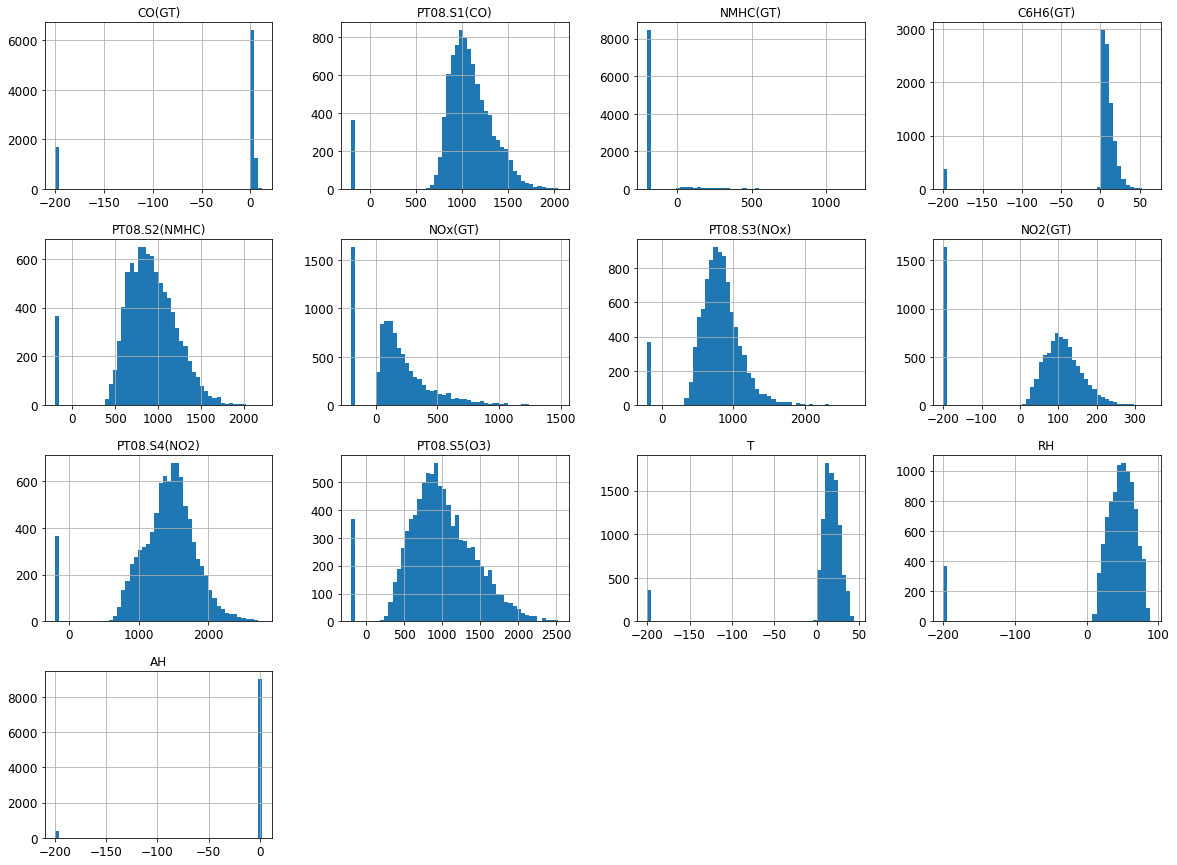

In [9]:
# Plot the histograms for all the features in the dataset

aqu_df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# To make this notebook's output identical at every run

np.random.seed(2)

In [11]:
# Plot correlation between temperature and other features

corr_matrix = aqu_df.corr()
corr_matrix["T"].sort_values(ascending=False)

T                1.000000
AH               0.981001
C6H6(GT)         0.971375
RH               0.885911
PT08.S4(NO2)     0.755060
PT08.S1(CO)      0.754844
PT08.S2(NMHC)    0.669025
PT08.S3(NOx)     0.588111
PT08.S5(O3)      0.503700
NMHC(GT)        -0.000009
CO(GT)          -0.068939
NO2(GT)         -0.084104
NOx(GT)         -0.138452
Name: T, dtype: float64

In [12]:
# Split the dataframe into features and labels

X = aqu_df.drop(['T'], axis=1).values
y = aqu_df.loc[:, 'T'].values
print("X shape: ", X.shape, "y shape: ", y.shape)
print("Sample X values: ", X[:5], "\n", "Sample y values: ", y[:5], )

X shape:  (9357, 12) y shape:  (9357,)
Sample X values:  [[2.600e+00 1.360e+03 1.500e+02 1.190e+01 1.046e+03 1.660e+02 1.056e+03
  1.130e+02 1.692e+03 1.268e+03 4.890e+01 7.578e-01]
 [2.000e+00 1.292e+03 1.120e+02 9.400e+00 9.550e+02 1.030e+02 1.174e+03
  9.200e+01 1.559e+03 9.720e+02 4.770e+01 7.255e-01]
 [2.200e+00 1.402e+03 8.800e+01 9.000e+00 9.390e+02 1.310e+02 1.140e+03
  1.140e+02 1.555e+03 1.074e+03 5.400e+01 7.502e-01]
 [2.200e+00 1.376e+03 8.000e+01 9.200e+00 9.480e+02 1.720e+02 1.092e+03
  1.220e+02 1.584e+03 1.203e+03 6.000e+01 7.867e-01]
 [1.600e+00 1.272e+03 5.100e+01 6.500e+00 8.360e+02 1.310e+02 1.205e+03
  1.160e+02 1.490e+03 1.110e+03 5.960e+01 7.888e-01]] 
 Sample y values:  [13.6 13.3 11.9 11.  11.2]


In [13]:
# Split the dataset into train, validation and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=2)
print(" X_train shape: ", X_train.shape,"\n", "y_train shape: ", y_train.shape,"\n",
     "X_val shape: ", X_val.shape,"\n", "y_val shape: ", y_val.shape,"\n",
     "X_test shape: ", X_test.shape,"\n", "y_test shape: ", y_test.shape,"\n")

 X_train shape:  (8444, 12) 
 y_train shape:  (8444,) 
 X_val shape:  (445, 12) 
 y_val shape:  (445,) 
 X_test shape:  (468, 12) 
 y_test shape:  (468,) 



In [14]:
# Model 1
# Sklearn Simple Linear Regression model with default parameters

from sklearn.linear_model import LinearRegression
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train, y_train)
print("Train set score: ", lr_model_1.score(X_train, y_train))
print("Validation set score: ", lr_model_1.score(X_val, y_val))
print("Test set score: ", lr_model_1.score(X_test, y_test))

Train set score:  0.9948541045745469
Validation set score:  0.9948926653846426
Test set score:  0.9952941220018083


In [15]:
# Mean Squared Errors of train, validation and test set predictions

from sklearn.metrics import mean_squared_error
print("Train set mse: ", mean_squared_error(y_train, lr_model_1.predict(X_train)))
print("Validation set mse: ", mean_squared_error(y_val, lr_model_1.predict(X_val)))
print("Test set mse: ", mean_squared_error(y_test, lr_model_1.predict(X_test)))

Train set mse:  9.648172895103862
Validation set mse:  8.287574867160899
Test set mse:  9.139727476838333


In [16]:
# Coefficients of the liear regression model
lr_model_1.coef_

array([ 1.66975008e-03, -1.59370278e-03, -8.25349710e-03, -7.31966657e-01,
        1.03532618e-03,  6.29745446e-03, -6.38235582e-03, -1.10890469e-02,
        2.47401340e-02, -3.98719260e-03, -3.17209422e-01,  2.10463359e+00])

In [17]:
# Since the R^2 values of validation and test set are close to 1 and low values of mean squared error no finetuning is done